In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tsp.experiment.batch import load_problem_batch, load_list_batch

from tsp.experiment.batch_solver import score_batch_2, _load_all_tour_segments_to_indices, score_tours_relative


def score_batch_4(problems_path: str, mds_problems_path: str, tours_path: str, base_tours_path: str):
    """Calculate tour errors relative to reference tours, for use on serialized problems and tours.
    Expects serialized tours (in tours_path) to be in segment format (i.e., generated by a human subject),
    and converts them to index format.
    Unless you're doing specialized work with the TSP_O library, you probably don't need this.

    Args:
        problems_path (str): path of root where problems are saved
        tours_path (str): path of root where tours are saved (in segment format)
        base_tours_path (str): path of root where reference tours are saved

    Returns:
        Tuple[NDArray, float, float]: (proportional errors, mean error, standard error of mean)
    """
    problems = load_problem_batch(problems_path)
    mds_problems = load_problem_batch(mds_problems_path)
    tours = _load_all_tour_segments_to_indices(mds_problems, tours_path)
    base = load_list_batch(base_tours_path, 'sol')
    return score_tours_relative(problems, tours, base)

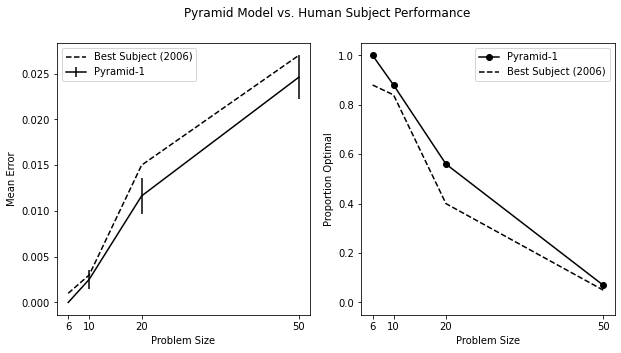

In [2]:
# Figure 3

problem_sizes = [6, 10, 20, 50]
problem_num = 100


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

models = ['2009_2_5']
for model in models:
    means = []
    stes = []
    for n in problem_sizes:
        errors, mean, ste = score_batch_2(f'../data/pyramid_test/problems_{n}', f'../data/pyramid_test/problems_{n}_{model}', f'../data/pyramid_test/problems_{n}_optimal')
        means.append(mean)
        stes.append(ste)
    axs[0].errorbar(problem_sizes, means, stes, label='Pyramid-1', c='k')

osk_means = [0.001, 0.003,0.015, 0.027]
axs[0].plot(problem_sizes, osk_means, 'k--', label='Best Subject (2006)')

axs[0].set_xticks(problem_sizes)
axs[0].set_xlabel('Problem Size')
axs[0].set_ylabel('Mean Error')
axs[0].legend()


for model in models:
    optimals = []
    for n in problem_sizes:
        errors, mean, ste = score_batch_2(f'../data/pyramid_test/problems_{n}', f'../data/pyramid_test/problems_{n}_{model}', f'../data/pyramid_test/problems_{n}_optimal')
        optimals.append(np.mean(np.isclose(errors, np.zeros(errors.shape))))
    axs[1].plot(problem_sizes, optimals, 'ko-', label='Pyramid-1')

osk_optimals = [0.88, 0.84, 0.40, 0.05]
axs[1].plot(problem_sizes, osk_optimals, 'k--', label='Best Subject (2006)')

axs[1].set_xticks(problem_sizes)
axs[1].set_xlabel('Problem Size')
axs[1].set_ylabel('Proportion Optimal')
axs[1].set_ylim(-0.05, 1.05)
axs[1].legend()

plt.suptitle('Pyramid Model vs. Human Subject Performance')
plt.show()

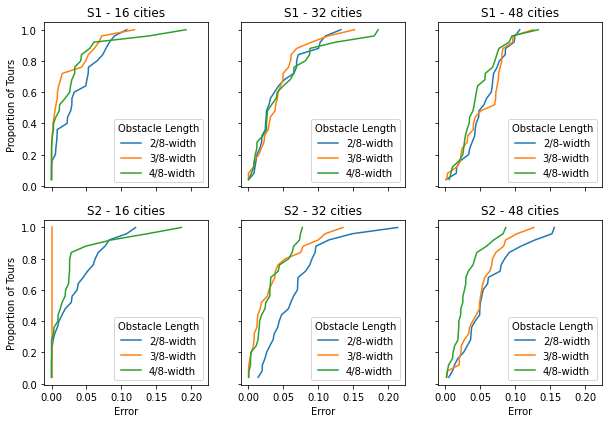

In [3]:
# Figure 6

sizes = (16, 32, 48)
widths = np.array((128, 192, 256))
subjects = ('s1', 's2')
width_dict = {128: '2/8', 192: '3/8', 256: '4/8'}

fig, axs = plt.subplots(2, 3, sharex='all', sharey='all', figsize=(10,6.67))

for i, subject in enumerate(subjects):
    for j, n in enumerate(sizes):
        for o in widths:
            errors = score_batch_2(f'../data/experiment_1/set_{n}_{o}/problems', f'../data/experiment_1/set_{n}_{o}/{subject}', f'../data/experiment_1/set_{n}_{o}/optimal')[0]
            axs[i,j].plot(np.sort(errors), np.arange(1, 26) / 25, label=f'{width_dict[o]}-width')
        axs[i,j].legend(title='Obstacle Length')
        axs[i,j].set_title(f'{subject.capitalize()} - {n} cities')
        if j == 0:
            axs[i,j].set_ylabel('Proportion of Tours')
        if i == 1:
            axs[i,j].set_xlabel('Error')

plt.show()

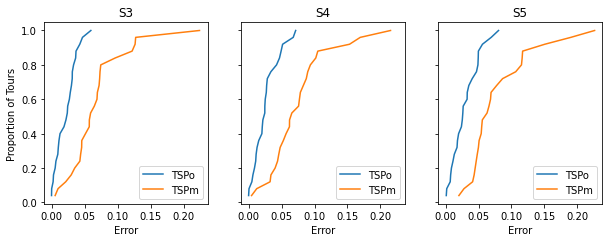

In [4]:
# Figure 7

subjects = ('s3', 's4', 's5')

fig, axs = plt.subplots(1, 3, sharex='all', sharey='all', figsize=(10,3.34))

for i, subject in enumerate(subjects):
    obs_errors = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', f'../data/experiment_2/subjects/48_256_obs/{subject}', '../data/experiment_2/subjects/48_256_obs/concorde')[0]
    mds_errors = score_batch_4('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/subjects/48_mds/problems', f'../data/experiment_2/subjects/48_mds/{subject}', '../data/experiment_2/subjects/48_256_obs/concorde')[0]
    axs[i].plot(np.sort(obs_errors), np.arange(1, 26) / 25, label='TSPo')
    axs[i].plot(np.sort(mds_errors), np.arange(1, 26) / 25, label='TSPm')
    if i == 0:
        axs[i].set_ylabel('Proportion of Tours')
    axs[i].set_xlabel('Error')
    axs[i].set_title(f'{subject.capitalize()}')
    axs[i].legend()

plt.show()

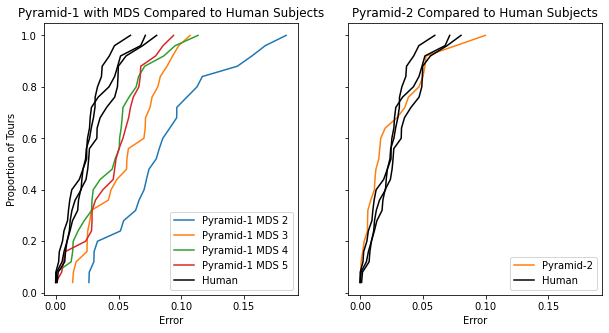

In [5]:
# Figure 8

fig, axs = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(10,5))

pyramid_errors_2 = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/models/pyramid/48_mds_2', '../data/experiment_2/subjects/48_256_obs/concorde')[0]
pyramid_errors_3 = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/models/pyramid/48_mds_3', '../data/experiment_2/subjects/48_256_obs/concorde')[0]
pyramid_errors_4 = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/models/pyramid/48_mds_4', '../data/experiment_2/subjects/48_256_obs/concorde')[0]
pyramid_errors_5 = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/models/pyramid/48_mds_5', '../data/experiment_2/subjects/48_256_obs/concorde')[0]
s3_errors = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/subjects/48_256_obs/s3', '../data/experiment_2/subjects/48_256_obs/concorde')[0]
s4_errors = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/subjects/48_256_obs/s4', '../data/experiment_2/subjects/48_256_obs/concorde')[0]
s5_errors = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/subjects/48_256_obs/s5', '../data/experiment_2/subjects/48_256_obs/concorde')[0]

axs[0].plot(np.sort(pyramid_errors_2), np.arange(1, 26) / 25, label='Pyramid-1 MDS 2')
axs[0].plot(np.sort(pyramid_errors_3), np.arange(1, 26) / 25, label='Pyramid-1 MDS 3')
axs[0].plot(np.sort(pyramid_errors_4), np.arange(1, 26) / 25, label='Pyramid-1 MDS 4')
axs[0].plot(np.sort(pyramid_errors_5), np.arange(1, 26) / 25, label='Pyramid-1 MDS 5')
axs[0].plot(np.sort(s3_errors), np.arange(1, 26) / 25, 'k', label='Human')
axs[0].plot(np.sort(s4_errors), np.arange(1, 26) / 25, 'k')
axs[0].plot(np.sort(s5_errors), np.arange(1, 26) / 25, 'k')
axs[0].set_xlabel('Error')
axs[0].set_ylabel('Proportion of Tours')
axs[0].legend()
axs[0].set_title('Pyramid-1 with MDS Compared to Human Subjects')

mod_pyramid_error = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/models/pyramid/48_obs', '../data/experiment_2/subjects/48_256_obs/concorde')[0]

axs[1].plot(np.sort(mod_pyramid_error), np.arange(1, 26) / 25, 'C1', label='Pyramid-2')
axs[1].plot(np.sort(s3_errors), np.arange(1, 26) / 25, 'k', label='Human')
axs[1].plot(np.sort(s4_errors), np.arange(1, 26) / 25, 'k')
axs[1].plot(np.sort(s5_errors), np.arange(1, 26) / 25, 'k')
axs[1].set_xlabel('Error')
axs[1].legend(loc='lower right')
axs[1].set_title('Pyramid-2 Compared to Human Subjects')

plt.show()

In [6]:
# Table 1

sizes = (16, 32, 48)
widths = np.array((128, 192, 256))


print('TSPe\n')

for o in widths:
    print(o)
    for n in sizes:
        _, e, s = score_batch_2(f'../data/experiment_1/set_{n}_{o}/problems', f'../data/experiment_1/set_{n}_{o}/optimal_no_obs', f'../data/experiment_1/set_{n}_{o}/optimal')
        TSPr = e
        _, e, s = score_batch_2(f'../data/experiment_1/set_{n}_{o}/problems', f'../data/experiment_1/set_{n}_{o}/optimal_mds', f'../data/experiment_1/set_{n}_{o}/optimal')
        TSPm = e
        mds_effect = (TSPr - TSPm) / TSPr
        print(round(TSPr, 2), end='\t')
    print()


print('\nME\n')

for o in widths:
    print(o)
    for n in sizes:
        _, e, s = score_batch_2(f'../data/experiment_1/set_{n}_{o}/problems', f'../data/experiment_1/set_{n}_{o}/optimal_no_obs', f'../data/experiment_1/set_{n}_{o}/optimal')
        TSPr = e
        _, e, s = score_batch_2(f'../data/experiment_1/set_{n}_{o}/problems', f'../data/experiment_1/set_{n}_{o}/optimal_mds', f'../data/experiment_1/set_{n}_{o}/optimal')
        TSPm = e
        mds_effect = (TSPr - TSPm) / TSPr
        print(round(mds_effect, 2), end='\t')
    print()


TSPe

128
0.01	0.02	0.03	
192
0.06	0.05	0.11	
256
0.08	0.15	0.23	

ME

128
0.48	0.63	0.55	
192
0.71	0.6	0.69	
256
0.87	0.69	0.73	


In [7]:
# Table 2

_, e, s = score_batch_2(f'../data/experiment_2/subjects/48_256_obs/problems', f'../data/experiment_2/subjects/48_no_obs/concorde', f'../data/experiment_2/subjects/48_256_obs/concorde')
TSPr = e
_, e, s = score_batch_2(f'../data/experiment_2/subjects/48_256_obs/problems', f'../data/experiment_2/subjects/48_mds/concorde', f'../data/experiment_2/subjects/48_256_obs/concorde')
TSPm = e
TSPo = 0.0
mds_effect = (TSPr - TSPm) / TSPr
print('conc', round(TSPo, 2), round(TSPr, 2), round(TSPm, 2), round(mds_effect, 2), sep='\t')

for subject in ('s3', 's4', 's5'):
    _, e, s = score_batch_4('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/subjects/48_no_obs/problems', f'../data/experiment_2/subjects/48_no_obs/{subject}', '../data/experiment_2/subjects/48_256_obs/concorde')
    TSPr = e
    _, e, s = score_batch_4('../data/experiment_2/subjects/48_256_obs/problems', '../data/experiment_2/subjects/48_mds/problems', f'../data/experiment_2/subjects/48_mds/{subject}', '../data/experiment_2/subjects/48_256_obs/concorde')
    TSPm = e
    _, e, s = score_batch_2('../data/experiment_2/subjects/48_256_obs/problems', f'../data/experiment_2/subjects/48_256_obs/{subject}', '../data/experiment_2/subjects/48_256_obs/concorde')
    TSPo = e
    mds_effect = (TSPr - TSPm) / (TSPr - TSPo)
    print(subject, round(TSPo, 2), round(TSPr, 2), round(TSPm, 2), round(mds_effect, 2), sep='\t')

conc	0.0	0.25	0.06	0.76
s3	0.02	0.27	0.07	0.81
s4	0.03	0.29	0.08	0.81
s5	0.03	0.26	0.08	0.78
